In [3]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',100)
pd.set_option('display.max_rows',None)

# Listas do 'livros mais...'

In [3]:
url_mais_lidos = 'https://www.skoob.com.br/livro/top_mais/lidos/'
response_mais_lidos = requests.get(url_mais_lidos)
html_mais_lidos = response_mais_lidos.content
soup_mais_lidos = BeautifulSoup(html_mais_lidos)
mais_lidos = [soup_mais_lidos.find_all(['a'], attrs = {"target" : "_blank"})[i].get('href') for i in range(106)]

In [4]:
url_mais_lendo = 'https://www.skoob.com.br/livro/top_mais/lendo/'
response_mais_lendo = requests.get(url_mais_lendo)
html_mais_lendo = response_mais_lendo.content
soup_mais_lendo = BeautifulSoup(html_mais_lendo)
mais_lendo = [soup_mais_lendo.find_all(['a'], attrs = {"target" : "_blank"})[i].get('href') for i in range(106)]

In [5]:
url_mais_quero_ler = 'https://www.skoob.com.br/livro/top_mais/queroler/'
response_mais_quero_ler = requests.get(url_mais_quero_ler)
html_mais_quero_ler = response_mais_quero_ler.content
soup_mais_quero_ler = BeautifulSoup(html_mais_quero_ler)
mais_quero_ler = [soup_mais_quero_ler.find_all(['a'], attrs = {"target" : "_blank"})[i].get('href') for i in range(106)]

In [6]:
url_mais_abondonados = 'https://www.skoob.com.br/livro/top_mais/abandonados/'
response_mais_abondonados = requests.get(url_mais_abondonados)
html_mais_abondonados = response_mais_abondonados.content
soup_mais_abondonados = BeautifulSoup(html_mais_abondonados)
mais_abondonados = [soup_mais_abondonados.find_all(['a'], attrs = {"target" : "_blank"})[i].get('href') for i in range(106)]

In [7]:
url_mais_desejados = 'https://www.skoob.com.br/livro/top_mais/desejados/'
response_mais_desejados = requests.get(url_mais_desejados)
html_mais_desejados = response_mais_desejados.content
soup_mais_desejados = BeautifulSoup(html_mais_desejados)
mais_desejados = [soup_mais_desejados.find_all(['a'], attrs = {"target" : "_blank"})[i].get('href') for i in range(106)]

In [8]:
url_mais_favoritos = 'https://www.skoob.com.br/livro/top_mais/favoritos/'
response_mais_favoritos = requests.get(url_mais_favoritos)
html_mais_favoritos = response_mais_favoritos.content
soup_mais_favoritos = BeautifulSoup(html_mais_favoritos)
mais_favoritos = [soup_mais_favoritos.find_all(['a'], attrs = {"target" : "_blank"})[i].get('href') for i in range(106)]

# Lista única dos "livros mais..." sem duplicadas

In [9]:
mais_mais = mais_lidos + mais_lendo + mais_quero_ler + mais_abondonados + mais_desejados + mais_favoritos
livros_mais = set(mais_mais)

# WebScraping

In [14]:
titulo = []
autor = []
ws_nota = []
ws_n_aval = []
ws_leram = []
ws_lendo = []
ws_querem_ler = []
ws_relendo = []
ws_abandonaram = []
ws_resenhas = []
ws_generos = []
ws_favoritos = []

for livro in livros_mais:
    url_livro = f'https://www.skoob.com.br/{livro}'
    response_livro = requests.get(url_livro)
    html_livro = response_livro.content
    soup_livro = BeautifulSoup(html_livro)
    
    titulo += [str(soup_livro.find_all('title')[0])[7:-8].replace("  "," ").split(" - ")[0]]
    autor += [str(soup_livro.find_all('title')[0])[7:-8].replace("  "," ").split(" - ")[-1]]
    ws_nota += [soup_livro.find_all(['star-rating'], attrs = {"size":"medium"})[0].get("rate")]
    ws_n_aval += [soup_livro.find_all(['div'], attrs = {"id":"pg-livro-box-rating-avaliadores-numero"})[0].text.split(" ")[0]]
    ws_leram += [soup_livro.find_all(['b'])[6].text]
    ws_lendo += [soup_livro.find_all(['b'])[5].text]
    ws_querem_ler += [soup_livro.find_all(['b'])[4].text]
    ws_relendo += [soup_livro.find_all(['b'])[3].text]
    ws_abandonaram += [soup_livro.find_all(['b'])[2].text]
    ws_resenhas += [soup_livro.find_all(['b'])[1].text]
    ws_generos += [soup_livro.find_all(['span'], attrs = {"class" : "pg-livro-generos"})[0].text]
    ws_favoritos += [soup_livro.find_all(['div','a'], attrs = {"class":"link_11_off l_icones sk-cor-branco"})[0].text.split(" ")[-1]]

# Tratamento dos dados e DataFrame

In [15]:
nota = [float(n) for n in ws_nota]
n_aval = [int(i.replace(".","")) for i in ws_n_aval]
leram = [int(i.replace(".","")) for i in ws_leram]
lendo = [int(i.replace(".","")) for i in ws_lendo]
querem_ler = [int(i.replace(".","")) for i in ws_querem_ler]
relendo = [int(i.replace(".","")) for i in ws_relendo]
abandonaram = [int(i.replace(".","")) for i in ws_abandonaram]
resenhas = [int(i.replace(".","")) for i in ws_resenhas]
favoritos = [int(i.replace("(","").replace(")","").replace(".","")) for i in ws_favoritos]


df_livros_mais = pd.DataFrame({"titulo" : titulo,
                         "autor" : autor,
                         "genero" : ws_generos,
                         "nota" : nota,
                         "n_aval" : n_aval,
                         "leram" : leram,
                         "lendo" : lendo,
                         "querem_ler" : querem_ler,
                         "relendo" : relendo,
                         "abandonaram" : abandonaram,
                         "favoritos" : favoritos,
                         "n_resenhas" : resenhas})

In [17]:
df_livros_mais

,titulo,autor,genero,nota,n_aval,leram,lendo,querem_ler,relendo,abandonaram,favoritos,n_resenhas
0,O Príncipe Cruel (O Povo do Ar #1),Holly Black,Fantasia / Ficção / Jovem adulto / Literatura Estrangeira,4.4,98298,149958,13471,124334,503,2260,17524,15781
1,Harry Potter e o Cálice de Fogo (Harry Potter #4),Joanne Kathleen Rowling,Aventura / Fantasia / Ficção / Infantojuvenil / Jovem adulto / Literatura Estrangeira / Romance,4.6,170204,499082,11997,180491,1006,2610,39339,6499
2,Corte de Espinhos e Rosas #1,Sarah Janet Maas,Fantasia / Ficção / Literatura Estrangeira / Romance,4.0,106574,187759,12329,138200,662,3749,13936,13517
3,O Hobbit,J.R.R. Tolkien,Fantasia / Ficção,4.5,67520,151619,7547,93147,512,2511,17635,3286
4,"Novembro, 9",Colleen Hoover,Literatura Estrangeira / Romance,4.1,58823,91728,5806,106963,101,1098,7469,10162
5,O Símbolo Perdido (Robert Langdon #3),Dan Brown,Aventura / Crime / Ficção / Literatura Estrangeira / Romance policial / Suspense e Mistério,4.1,45993,142605,3166,71255,124,2173,6146,1379
6,O Herói Perdido (Os Heróis do Olimpo #1),Rick Riordan,Ficção / Fantasia / Literatura Estrangeira / Aventura / Infantojuvenil,4.2,66480,172651,4048,52242,273,1242,8100,3250
7,A Batalha do Apocalipse,Eduardo Spohr,Fantasia / Literatura Brasileira,4.3,25791,45034,4308,64713,211,4024,6778,1165
8,Morte Súbita,Joanne Kathleen Rowling,Literatura Estrangeira / Ficção,3.8,19299,36812,3864,107056,40,6453,2970,1154
9,A arte da guerra (L&amp;PM Pocket),Sun Tzu,Filosofia / Literatura Estrangeira / Não-ficção / História,3.8,29598,52489,2806,17602,226,2095,1993,1413


In [16]:
#df_livros_mais.to_csv('livros_212.csv', index = False)

# Importar os rankings extraidos (14/01/2023)

In [18]:
rank_mais_lidos = pd.read_csv('rank_mais_lidos.csv')
rank_mais_lendo = pd.read_csv('rank_mais_lendo.csv')
rank_mais_quero_ler = pd.read_csv('rank_mais_quero_ler.csv')
rank_mais_abandonados = pd.read_csv('rank_mais_abandonados.csv')
rank_mais_desejados = pd.read_csv('rank_mais_desejados.csv')
rank_mais_favoritos = pd.read_csv('rank_mais_favoritos.csv')

In [19]:
df_livros_rank = pd.merge(df_livros_mais, rank_mais_lidos, how = 'left', on = 'titulo' )
df_livros_rank = pd.merge(df_livros_rank, rank_mais_lendo, how = 'left', on = 'titulo' )
df_livros_rank = pd.merge(df_livros_rank, rank_mais_quero_ler, how = 'left', on = 'titulo' )
df_livros_rank = pd.merge(df_livros_rank, rank_mais_abandonados, how = 'left', on = 'titulo' )
df_livros_rank = pd.merge(df_livros_rank, rank_mais_desejados, how = 'left', on = 'titulo' )
df_livros_rank = pd.merge(df_livros_rank, rank_mais_favoritos, how = 'left', on = 'titulo' )
df_livros_rank

,titulo,autor,genero,nota,n_aval,leram,lendo,querem_ler,relendo,abandonaram,favoritos,n_resenhas,mais_lidos,mais_lendo,mais_quero_ler,mais_abondonados,mais_desejados,mais_favoritos
0,O Príncipe Cruel (O Povo do Ar #1),Holly Black,Fantasia / Ficção / Jovem adulto / Literatura Estrangeira,4.4,98298,149958,13471,124334,503,2260,17524,15781,60.0,14.0,36.0,76.0,51.0,34.0
1,Harry Potter e o Cálice de Fogo (Harry Potter #4),Joanne Kathleen Rowling,Aventura / Fantasia / Ficção / Infantojuvenil / Jovem adulto / Literatura Estrangeira / Romance,4.6,170204,499082,11997,180491,1006,2610,39339,6499,6.0,19.0,14.0,60.0,32.0,8.0
2,Corte de Espinhos e Rosas #1,Sarah Janet Maas,Fantasia / Ficção / Literatura Estrangeira / Romance,4.0,106574,187759,12329,138200,662,3749,13936,13517,44.0,16.0,26.0,33.0,25.0,46.0
3,O Hobbit,J.R.R. Tolkien,Fantasia / Ficção,4.5,67520,151619,7547,93147,512,2511,17635,3286,58.0,46.0,64.0,68.0,44.0,33.0
4,"Novembro, 9",Colleen Hoover,Literatura Estrangeira / Romance,4.1,58823,91728,5806,106963,101,1098,7469,10162,NaN,69.0,53.0,NaN,78.0,NaN
5,O Símbolo Perdido (Robert Langdon #3),Dan Brown,Aventura / Crime / Ficção / Literatura Estrangeira / Romance policial / Suspense e Mistério,4.1,45993,142605,3166,71255,124,2173,6146,1379,62.0,NaN,97.0,83.0,NaN,NaN
6,O Herói Perdido (Os Heróis do Olimpo #1),Rick Riordan,Ficção / Fantasia / Literatura Estrangeira / Aventura / Infantojuvenil,4.2,66480,172651,4048,52242,273,1242,8100,3250,47.0,103.0,NaN,NaN,NaN,NaN
7,A Batalha do Apocalipse,Eduardo Spohr,Fantasia / Literatura Brasileira,4.3,25791,45034,4308,64713,211,4024,6778,1165,NaN,97.0,NaN,26.0,NaN,NaN
8,Morte Súbita,Joanne Kathleen Rowling,Literatura Estrangeira / Ficção,3.8,19299,36812,3864,107056,40,6453,2970,1154,NaN,NaN,52.0,12.0,NaN,NaN
9,A arte da guerra (L&amp;PM Pocket),Sun Tzu,Filosofia / Literatura Estrangeira / Não-ficção / História,3.8,29598,52489,2806,17602,226,2095,1993,1413,NaN,NaN,NaN,91.0,NaN,NaN


# CSV Final
Livros mais lidos, lendo, quero ler, abandonados, desejados, favoritos (DB unificado)

In [6]:

df_livros_rank = pd.read_csv('livros.csv')

In [52]:
df_livros_rank[['genero']].groupby(['genero']).value_counts().sort_values(ascending=False)

genero
Ficção / Literatura Estrangeira / Romance                                                                                                              15
Fantasia / Ficção / Literatura Estrangeira / Romance                                                                                                    8
Ficção / Jovem adulto / Literatura Estrangeira / Romance                                                                                                6
Ficção / Literatura Brasileira / Romance                                                                                                                5
Fantasia / Literatura Estrangeira                                                                                                                       5
Literatura Estrangeira / Ficção / Romance                                                                                                               4
Fantasia / Ficção / Jovem adulto / Literatura Estrangeira            

In [53]:
pat = '.*Literatura Estrangeira.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'literatura'] = 'literatura estrangeira'

In [55]:
pat = '.*Literatura Brasileira.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'literatura'] = 'literatura brasileira'

In [60]:
df_livros_rank.loc[df_livros_rank['titulo']=='Vidas Secas', 'literatura'] = 'literatura brasileira'

In [62]:
df_livros_rank.loc[df_livros_rank['titulo']=='1808', 'literatura'] = 'literatura brasileira'

In [64]:
df_livros_rank.loc[df_livros_rank['literatura'].isna()==True,'literatura'] = 'literatura estrangeira'

In [14]:
df_livros_rank

,titulo,autor,genero,nota,n_aval,leram,lendo,querem_ler,relendo,abandonaram,favoritos,n_resenhas,mais_lidos,mais_lendo,mais_quero_ler,mais_abondonados,mais_desejados,mais_favoritos,literatura,ficção/não_ficção
0,O Príncipe Cruel (O Povo do Ar #1),Holly Black,Fantasia / Ficção / Jovem adulto / Literatura Estrangeira,4.4,98298,149958,13471,124334,503,2260,17524,15781,60.0,14.0,36.0,76.0,51.0,34.0,literatura estrangeira,ficção
1,Harry Potter e o Cálice de Fogo (Harry Potter #4),Joanne Kathleen Rowling,Aventura / Fantasia / Ficção / Infantojuvenil / Jovem adulto / Literatura Estrangeira / Romance,4.6,170204,499082,11997,180491,1006,2610,39339,6499,6.0,19.0,14.0,60.0,32.0,8.0,literatura estrangeira,ficção
2,Corte de Espinhos e Rosas #1,Sarah Janet Maas,Fantasia / Ficção / Literatura Estrangeira / Romance,4.0,106574,187759,12329,138200,662,3749,13936,13517,44.0,16.0,26.0,33.0,25.0,46.0,literatura estrangeira,ficção
3,O Hobbit,J.R.R. Tolkien,Fantasia / Ficção,4.5,67520,151619,7547,93147,512,2511,17635,3286,58.0,46.0,64.0,68.0,44.0,33.0,literatura estrangeira,ficção
4,"Novembro, 9",Colleen Hoover,Literatura Estrangeira / Romance,4.1,58823,91728,5806,106963,101,1098,7469,10162,NaN,69.0,53.0,NaN,78.0,NaN,literatura estrangeira,ficção
5,O Símbolo Perdido (Robert Langdon #3),Dan Brown,Aventura / Crime / Ficção / Literatura Estrangeira / Romance policial / Suspense e Mistério,4.1,45993,142605,3166,71255,124,2173,6146,1379,62.0,NaN,97.0,83.0,NaN,NaN,literatura estrangeira,ficção
6,O Herói Perdido (Os Heróis do Olimpo #1),Rick Riordan,Ficção / Fantasia / Literatura Estrangeira / Aventura / Infantojuvenil,4.2,66480,172651,4048,52242,273,1242,8100,3250,47.0,103.0,NaN,NaN,NaN,NaN,literatura estrangeira,ficção
7,A Batalha do Apocalipse,Eduardo Spohr,Fantasia / Literatura Brasileira,4.3,25791,45034,4308,64713,211,4024,6778,1165,NaN,97.0,NaN,26.0,NaN,NaN,literatura brasileira,ficção
8,Morte Súbita,Joanne Kathleen Rowling,Literatura Estrangeira / Ficção,3.8,19299,36812,3864,107056,40,6453,2970,1154,NaN,NaN,52.0,12.0,NaN,NaN,literatura estrangeira,ficção
9,A arte da guerra (L&amp;PM Pocket),Sun Tzu,Filosofia / Literatura Estrangeira / Não-ficção / História,3.8,29598,52489,2806,17602,226,2095,1993,1413,NaN,NaN,NaN,91.0,NaN,NaN,literatura estrangeira,não_ficção


In [115]:
df_livros_rank.rename({'fiction/non-fiction':'ficção/não_ficção'},axis=1,inplace=True)

In [118]:
pat = '.*Fantasia.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'ficção/não_ficção'] = 'ficção'

In [119]:
pat = '.*História.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'ficção/não_ficção'] = 'não_ficção'

In [120]:
pat = '.*Autoajuda.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'ficção/não_ficção'] = 'não_ficção'

In [121]:
pat = '.*Biografia.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'ficção/não_ficção'] = 'não_ficção'

In [ ]:
pat = '.*Não-ficção.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'ficção/não_ficção'] = 'não_ficção'

In [ ]:
pat = '.*Ficção.*'
df_livros_rank.loc[df_livros_rank['genero'].str.contains(pat)==True, 'ficção/não_ficção'] = 'ficção'

In [122]:
df_livros_rank.loc[df_livros_rank['ficção/não_ficção'].isna()==True,'ficção/não_ficção'] = 'ficção'

In [17]:

df_livros_rank.loc[df_livros_rank['ficção/não_ficção'] == 'não_ficção',:]

,titulo,autor,genero,nota,n_aval,leram,lendo,querem_ler,relendo,abandonaram,favoritos,n_resenhas,mais_lidos,mais_lendo,mais_quero_ler,mais_abondonados,mais_desejados,mais_favoritos,literatura,ficção/não_ficção
9,A arte da guerra (L&amp;PM Pocket),Sun Tzu,Filosofia / Literatura Estrangeira / Não-ficção / História,3.8,29598,52489,2806,17602,226,2095,1993,1413,NaN,NaN,NaN,91.0,NaN,NaN,literatura estrangeira,não_ficção
19,O segredo (The Secret),Rhonda Byrne,Autoajuda / Literatura Estrangeira,3.3,17304,33234,1445,6492,179,3560,1344,784,NaN,NaN,NaN,38.0,NaN,NaN,literatura estrangeira,não_ficção
95,Lady Killers: Assassinas em Série,Tori Telfer,"Biografia, Autobiografia, Memórias / Literatura Estrangeira / Não-ficção",4.2,16792,29167,10710,74075,58,1845,1617,2902,NaN,26.0,88.0,NaN,NaN,NaN,literatura estrangeira,não_ficção
111,O Diário de Anne Frank,Anne Frank,"Literatura Estrangeira / Biografia, Autobiografia, Memórias / Drama / Não-ficção",4.5,111695,315386,21305,253896,694,8793,19696,8127,22.0,2.0,4.0,6.0,3.0,30.0,literatura estrangeira,não_ficção
114,Sapiens,Yuval Noah Harari,História / Literatura Estrangeira,4.6,17460,27715,9295,35980,112,1245,3438,1591,NaN,34.0,NaN,NaN,NaN,NaN,literatura estrangeira,não_ficção
131,1808,Laurentino Gomes,História / História do Brasil / História Geral,4.1,18253,35688,3176,69358,83,2607,1554,869,NaN,NaN,100.0,61.0,NaN,NaN,literatura brasileira,não_ficção
140,Mulheres que Correm com os Lobos,Clarissa Pinkola Estés,Literatura Estrangeira / Psicologia / Não-ficção,4.3,5675,11730,12555,53689,210,2356,1819,786,NaN,15.0,NaN,72.0,NaN,NaN,literatura estrangeira,não_ficção
149,O Poder do Hábito,Charles Duhigg,Não-ficção,4.2,17578,30916,7830,36559,111,2003,1830,1469,NaN,41.0,NaN,97.0,NaN,NaN,literatura estrangeira,não_ficção
180,A Sutil Arte de Ligar o F*da-se,Manson Mark,Literatura Estrangeira / Não-ficção,3.7,28026,42239,5741,22800,113,3139,1907,2288,NaN,72.0,NaN,48.0,NaN,NaN,literatura estrangeira,não_ficção
183,"Comer, Rezar, Amar",Elizabeth Gilbert,"Biografia, Autobiografia, Memórias / Literatura Estrangeira / Romance / Turismo e Viagens",3.9,17593,33859,1943,11901,87,3948,3040,846,NaN,NaN,NaN,31.0,NaN,NaN,literatura estrangeira,não_ficção


In [16]:
df_livros_rank.to_csv('livros.csv', index = False)

array([[<AxesSubplot:xlabel='nota', ylabel='nota'>,
        <AxesSubplot:xlabel='n_aval', ylabel='nota'>,
        <AxesSubplot:xlabel='leram', ylabel='nota'>,
        <AxesSubplot:xlabel='lendo', ylabel='nota'>,
        <AxesSubplot:xlabel='querem_ler', ylabel='nota'>,
        <AxesSubplot:xlabel='relendo', ylabel='nota'>,
        <AxesSubplot:xlabel='abandonaram', ylabel='nota'>,
        <AxesSubplot:xlabel='favoritos', ylabel='nota'>,
        <AxesSubplot:xlabel='n_resenhas', ylabel='nota'>,
        <AxesSubplot:xlabel='mais_lidos', ylabel='nota'>,
        <AxesSubplot:xlabel='mais_lendo', ylabel='nota'>,
        <AxesSubplot:xlabel='mais_quero_ler', ylabel='nota'>,
        <AxesSubplot:xlabel='mais_abondonados', ylabel='nota'>,
        <AxesSubplot:xlabel='mais_desejados', ylabel='nota'>,
        <AxesSubplot:xlabel='mais_favoritos', ylabel='nota'>],
       [<AxesSubplot:xlabel='nota', ylabel='n_aval'>,
        <AxesSubplot:xlabel='n_aval', ylabel='n_aval'>,
        <AxesSubplot:xla

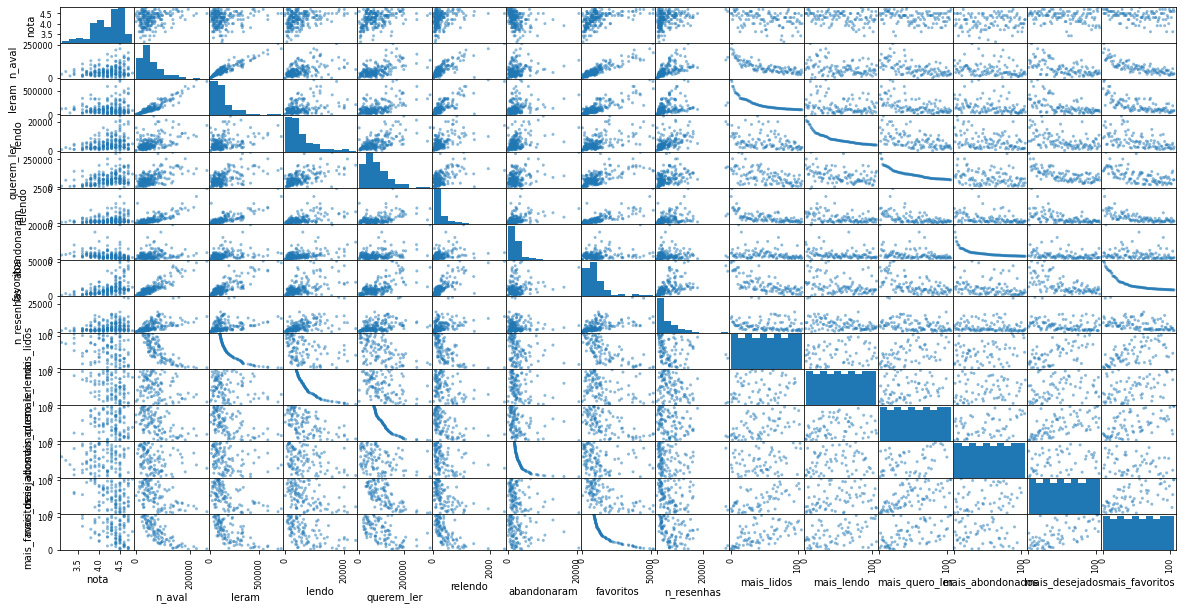

In [128]:
pd.plotting.scatter_matrix(df_livros_rank, figsize=(20,10))


In [108]:
df_livros_rank.describe

<bound method NDFrame.describe of                                                                              titulo  \
0                                                O Príncipe Cruel (O Povo do Ar #1)   
1                                 Harry Potter e o Cálice de Fogo (Harry Potter #4)   
2                                                      Corte de Espinhos e Rosas #1   
3                                                                          O Hobbit   
4                                                                       Novembro, 9   
5                                             O Símbolo Perdido (Robert Langdon #3)   
6                                          O Herói Perdido (Os Heróis do Olimpo #1)   
7                                                           A Batalha do Apocalipse   
8                                                                      Morte Súbita   
9                                                A arte da guerra (L&amp;PM Pocket)   
10       